In [1]:
import pandas as pd
import os
import seaborn as sns
sns.set(style="darkgrid")

**Penggabungan laporan per bulan. Masih ada kesalahan input dari kota Lamandau**

In [2]:
#path = "./Sheika_2019_2020"
#files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

#all_months_data = pd.DataFrame()

#for file in files:
#    current_data = pd.read_excel(path+"/"+file)
#    all_months_data = pd.concat([all_months_data, current_data])
    
#all_months_data.to_excel("all_data_sheika.xlsx", index=False)

In [3]:
# Pakai file all_data_sheika_edit -> Error di kota Lamandau sudah solved

all_data = pd.read_excel("all_data_sheika_edit.xlsx")
# all_data = pd.read_csv("all_data_sheika.csv")
all_data[['JML', 'NOMINAL', 'ORDERAN']].head()

,JML,NOMINAL,ORDERAN
0,1.0,208003,Fazilla Purple Kids size.5 (set)
1,6.0,1725003,- ELENORA CREAM L(5) do\n- Elenora kids cream ...
2,2.0,354003,- Keya Taro XL do\n- Khimar Tisha Lavender
3,2.0,464003,- Alesha peach M do\n- Khimar elenora peach (p...
4,1.0,207003,Tisha Putih M do


In [4]:
# Find NAN
#nan_df = all_data[all_data['NOMINAL'].isna()]
#nan_df.head(50)

# Menghilangkan nilai null di kolom 'NOMINAL'
all_data = all_data[pd.notnull(all_data['NOMINAL'])]
all_data.head()

,#REF!,ALAMAT,BANK,CS,DISKON,EKSPEDISI,JML,KET,NAMA,NAMA/KODE CS,NO HP,NOMINAL,ONGKIR,ORDERAN,TGL ORDER,TGL TRF,Unnamed: 16,VALIDASI,no
0,NaN,Jl. Tempurejo gang V/7 Rt/Rw: 002/003 kec : Mu...,BCA,CS YENI (082321458214),NaN,JNE REG,1.0,NaN,Ulick,NaN,085737824872,208003,19000,Fazilla Purple Kids size.5 (set),30/03/19,201904.0,NaN,WAWAT,(01)1
1,NaN,JL.PEMDA RT.9 MALINAU HULU Kecamatan :MALINAU ...,BCA,CS YENI (082321458214),25000,JNE REG,6.0,NaN,RATNA PRATININGRUM,NaN,082254494711,1725003,146000,- ELENORA CREAM L(5) do\n- Elenora kids cream ...,30/03/19,201904.0,NaN,WAWAT,(01)2
2,NaN,Dsn. Ciagem RT 13/03 Dsa. Jayamakmur Kecamatan...,BCA,CS YENI (082321458214),NaN,JNE REG,2.0,NaN,Nurlaelah,NaN,085811795122,354003,16000,- Keya Taro XL do\n- Khimar Tisha Lavender,30/03/19,201904.0,NaN,WAWAT,(01)3
3,NaN,Jalan segara madu/pasar ikan kedonganan Depan ...,BRI,CS YENI (082321458214),NaN,JNE REG,2.0,NaN,A junaidi,NaN,083119548203,464003,24000,- Alesha peach M do\n- Khimar elenora peach (p...,30/03/19,201904.0,NaN,WAWAT,(01)4
4,NaN,Perum ckm blok D13 no 18(warna ungu) rt 25 rw ...,BCA,CS YENI (082321458214),NaN,JNE REG,1.0,NaN,Ariyanto saputro,NaN,081317578751,207003,12000,Tisha Putih M do,31/03/19,201904.0,NaN,WAWAT,(01)5


In [5]:
# Output jumlah dari masing-masing type di kolom TGL TRF

all_data['TGL TRF'].apply(type).value_counts()

<class 'float'>    11311
Name: TGL TRF, dtype: int64

In [6]:
# Cek apakah terdapat elemen di kolom 'TGL TRF' yang bernilai string

tgl_dt = all_data[all_data['TGL TRF'].apply(lambda x: isinstance(x, str))]
tgl_dt.head(50)

,#REF!,ALAMAT,BANK,CS,DISKON,EKSPEDISI,JML,KET,NAMA,NAMA/KODE CS,NO HP,NOMINAL,ONGKIR,ORDERAN,TGL ORDER,TGL TRF,Unnamed: 16,VALIDASI,no


In [90]:
# List semua kota/kab di Indonesia

df = pd.read_excel('daftar_kota_provinsi.xlsx') # can also index sheet by name or fetch all sheets
list_kota = df['Kota, Kabupaten'].tolist()

In [91]:
# Mengubah list_kota menjadi uppercase

list_kota_u = [x.upper() for x in list_kota]

In [9]:
# Mengubah kolom ALAMAT menjadi uppercase

all_data['ALAMAT'] = all_data['ALAMAT'].str.upper()
all_data.head()

,#REF!,ALAMAT,BANK,CS,DISKON,EKSPEDISI,JML,KET,NAMA,NAMA/KODE CS,NO HP,NOMINAL,ONGKIR,ORDERAN,TGL ORDER,TGL TRF,Unnamed: 16,VALIDASI,no
0,NaN,JL. TEMPUREJO GANG V/7 RT/RW: 002/003 KEC : MU...,BCA,CS YENI (082321458214),NaN,JNE REG,1.0,NaN,Ulick,NaN,085737824872,208003,19000,Fazilla Purple Kids size.5 (set),30/03/19,201904.0,NaN,WAWAT,(01)1
1,NaN,JL.PEMDA RT.9 MALINAU HULU KECAMATAN :MALINAU ...,BCA,CS YENI (082321458214),25000,JNE REG,6.0,NaN,RATNA PRATININGRUM,NaN,082254494711,1725003,146000,- ELENORA CREAM L(5) do\n- Elenora kids cream ...,30/03/19,201904.0,NaN,WAWAT,(01)2
2,NaN,DSN. CIAGEM RT 13/03 DSA. JAYAMAKMUR KECAMATAN...,BCA,CS YENI (082321458214),NaN,JNE REG,2.0,NaN,Nurlaelah,NaN,085811795122,354003,16000,- Keya Taro XL do\n- Khimar Tisha Lavender,30/03/19,201904.0,NaN,WAWAT,(01)3
3,NaN,JALAN SEGARA MADU/PASAR IKAN KEDONGANAN DEPAN ...,BRI,CS YENI (082321458214),NaN,JNE REG,2.0,NaN,A junaidi,NaN,083119548203,464003,24000,- Alesha peach M do\n- Khimar elenora peach (p...,30/03/19,201904.0,NaN,WAWAT,(01)4
4,NaN,PERUM CKM BLOK D13 NO 18(WARNA UNGU) RT 25 RW ...,BCA,CS YENI (082321458214),NaN,JNE REG,1.0,NaN,Ariyanto saputro,NaN,081317578751,207003,12000,Tisha Putih M do,31/03/19,201904.0,NaN,WAWAT,(01)5


In [10]:
# regex untuk mendeteksi nama kota dalam kolom alamat

pat = '({})'.format('|'.join([r'\b{}\b'.format(x) for x in list_kota_u]))

# all_data['Kota'] = 

all_data_kota = all_data['ALAMAT'].str.extract(pat)
all_data_kota.head()

#all_data_kota[0].apply(type).value_counts()

,0,1
0,SURABAYA,NaN
1,MALINAU,NaN
2,KARAWANG,NaN
3,BADUNG,NaN
4,KARAWANG,NaN


In [11]:
#Menambahkan kolom KOTA ke df

kota_float = all_data_kota[0].apply(lambda x: isinstance(x, float))
#kota_str = kota_float.astype('str')
#kota_str
all_data['KOTA'] = all_data_kota[0]
all_data.head()

,#REF!,ALAMAT,BANK,CS,DISKON,EKSPEDISI,JML,KET,NAMA,NAMA/KODE CS,NO HP,NOMINAL,ONGKIR,ORDERAN,TGL ORDER,TGL TRF,Unnamed: 16,VALIDASI,no,KOTA
0,NaN,JL. TEMPUREJO GANG V/7 RT/RW: 002/003 KEC : MU...,BCA,CS YENI (082321458214),NaN,JNE REG,1.0,NaN,Ulick,NaN,085737824872,208003,19000,Fazilla Purple Kids size.5 (set),30/03/19,201904.0,NaN,WAWAT,(01)1,SURABAYA
1,NaN,JL.PEMDA RT.9 MALINAU HULU KECAMATAN :MALINAU ...,BCA,CS YENI (082321458214),25000,JNE REG,6.0,NaN,RATNA PRATININGRUM,NaN,082254494711,1725003,146000,- ELENORA CREAM L(5) do\n- Elenora kids cream ...,30/03/19,201904.0,NaN,WAWAT,(01)2,MALINAU
2,NaN,DSN. CIAGEM RT 13/03 DSA. JAYAMAKMUR KECAMATAN...,BCA,CS YENI (082321458214),NaN,JNE REG,2.0,NaN,Nurlaelah,NaN,085811795122,354003,16000,- Keya Taro XL do\n- Khimar Tisha Lavender,30/03/19,201904.0,NaN,WAWAT,(01)3,KARAWANG
3,NaN,JALAN SEGARA MADU/PASAR IKAN KEDONGANAN DEPAN ...,BRI,CS YENI (082321458214),NaN,JNE REG,2.0,NaN,A junaidi,NaN,083119548203,464003,24000,- Alesha peach M do\n- Khimar elenora peach (p...,30/03/19,201904.0,NaN,WAWAT,(01)4,BADUNG
4,NaN,PERUM CKM BLOK D13 NO 18(WARNA UNGU) RT 25 RW ...,BCA,CS YENI (082321458214),NaN,JNE REG,1.0,NaN,Ariyanto saputro,NaN,081317578751,207003,12000,Tisha Putih M do,31/03/19,201904.0,NaN,WAWAT,(01)5,KARAWANG


In [92]:
# Mendeteksi row KOTA dengan value NaN

all_data_kotana = all_data[all_data['KOTA'].isna()]

In [13]:
#top 10 kota dengan transaksi tertinggi

groupby_kota = all_data.groupby(['KOTA']).sum().nlargest(10,'JML')
#groupby_kota['JML'].apply(type)
#groupby_kota.apply(type)
#groupby_kota.head(10)

#top10_kota = groupby_kota.drop(columns=['#REF!', 'TGL TRF'])
top10_kota = groupby_kota.drop(columns=['#REF!'])
top10_kota.head(10)

,JML,TGL TRF
KOTA,,
BEKASI,1439.0,181128828.0
TANGERANG,1007.0,129032929.0
BOGOR,832.0,105606556.0
KARAWANG,692.0,88242543.0
BANDUNG,628.0,79963487.0
DEPOK,380.0,44422568.0
SERANG,361.0,44827244.0
TEGAL,339.0,44625086.0
INDRAMAYU,304.0,33115971.0


In [14]:
import matplotlib.pyplot as plt

#plt.plot(top10_kota)
#plt.xticks(rotation='45')
#plt.ylabel('Penjualan')
#plt.xlabel('Kabupaten')
#plt.show()

#sns.distplot(top10_kota['JML'])

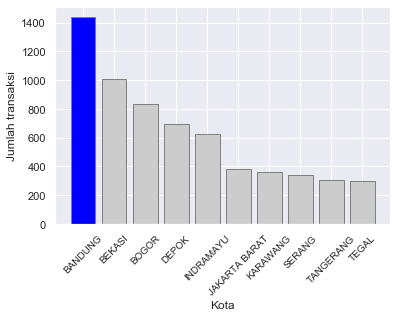

In [15]:
kotas = [kota for kota, df in top10_kota.groupby(['KOTA'])]

plt.bar(kotas, top10_kota['JML'], color = ['blue', '0.8', '0.8', '0.8', '0.8', '0.8', '0.8', '0.8', '0.8', '0.8'], edgecolor='grey')
plt.xticks(kotas, rotation = '45', size = 10)
plt.ylabel('Jumlah transaksi')
plt.xlabel('Kota')
plt.show()

[Text(0, 0, 'BEKASI'),
 Text(0, 0, 'TANGERANG'),
 Text(0, 0, 'BOGOR'),
 Text(0, 0, 'KARAWANG'),
 Text(0, 0, 'BANDUNG'),
 Text(0, 0, 'DEPOK'),
 Text(0, 0, 'SERANG'),
 Text(0, 0, 'TEGAL'),
 Text(0, 0, 'INDRAMAYU'),
 Text(0, 0, 'JAKARTA BARAT')]

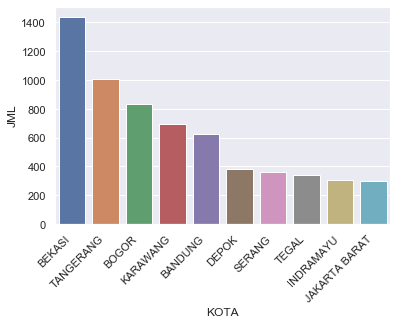

In [16]:
kota_chart = sns.barplot(x=top10_kota.index,y='JML', data=top10_kota)
#top10_kota.info()
kota_chart.set_xticklabels(kota_chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [17]:
# Mengetahui pembeli setia
# Nama pembeli dalam uppercase

all_data['NAMA'] = all_data['NAMA'].str.upper()
all_data.head()

,#REF!,ALAMAT,BANK,CS,DISKON,EKSPEDISI,JML,KET,NAMA,NAMA/KODE CS,NO HP,NOMINAL,ONGKIR,ORDERAN,TGL ORDER,TGL TRF,Unnamed: 16,VALIDASI,no,KOTA
0,NaN,JL. TEMPUREJO GANG V/7 RT/RW: 002/003 KEC : MU...,BCA,CS YENI (082321458214),NaN,JNE REG,1.0,NaN,ULICK,NaN,085737824872,208003,19000,Fazilla Purple Kids size.5 (set),30/03/19,201904.0,NaN,WAWAT,(01)1,SURABAYA
1,NaN,JL.PEMDA RT.9 MALINAU HULU KECAMATAN :MALINAU ...,BCA,CS YENI (082321458214),25000,JNE REG,6.0,NaN,RATNA PRATININGRUM,NaN,082254494711,1725003,146000,- ELENORA CREAM L(5) do\n- Elenora kids cream ...,30/03/19,201904.0,NaN,WAWAT,(01)2,MALINAU
2,NaN,DSN. CIAGEM RT 13/03 DSA. JAYAMAKMUR KECAMATAN...,BCA,CS YENI (082321458214),NaN,JNE REG,2.0,NaN,NURLAELAH,NaN,085811795122,354003,16000,- Keya Taro XL do\n- Khimar Tisha Lavender,30/03/19,201904.0,NaN,WAWAT,(01)3,KARAWANG
3,NaN,JALAN SEGARA MADU/PASAR IKAN KEDONGANAN DEPAN ...,BRI,CS YENI (082321458214),NaN,JNE REG,2.0,NaN,A JUNAIDI,NaN,083119548203,464003,24000,- Alesha peach M do\n- Khimar elenora peach (p...,30/03/19,201904.0,NaN,WAWAT,(01)4,BADUNG
4,NaN,PERUM CKM BLOK D13 NO 18(WARNA UNGU) RT 25 RW ...,BCA,CS YENI (082321458214),NaN,JNE REG,1.0,NaN,ARIYANTO SAPUTRO,NaN,081317578751,207003,12000,Tisha Putih M do,31/03/19,201904.0,NaN,WAWAT,(01)5,KARAWANG


In [18]:
groupby_nama = all_data.groupby(['NAMA']).sum().nlargest(20,'JML')
top10_nama = groupby_nama.drop(columns=['#REF!']).drop(columns=['TGL TRF'])
top10_nama.head()

,JML
NAMA,
INDAH YULIANI RAHIM,39.0
LIA,38.0
CUNSIN LUTFIA,36.0
TOKO ALYA,36.0
SRI WAHYUNI,26.0


In [19]:
top10_nama.index

Index(['INDAH YULIANI RAHIM', 'LIA', 'CUNSIN LUTFIA', 'TOKO ALYA',
       'SRI WAHYUNI', 'YANI', 'ANITA', 'FITRI', 'YULIANA', 'RIKA RAHMAWATY',
       'SULASTRI', 'SIANE CENDANI', 'AGUSTINA DWI YULIANA', 'AIRA',
       'ELIYA NORA', 'YUNITA', 'NURHAYATI', 'TRI SULISTYANINGSIH', 'WINDA',
       'FITRIYANI'],
      dtype='object', name='NAMA')

[Text(0, 0, 'INDAH YULIANI RAHIM'),
 Text(0, 0, 'LIA'),
 Text(0, 0, 'CUNSIN LUTFIA'),
 Text(0, 0, 'TOKO ALYA'),
 Text(0, 0, 'SRI WAHYUNI'),
 Text(0, 0, 'YANI'),
 Text(0, 0, 'ANITA'),
 Text(0, 0, 'FITRI'),
 Text(0, 0, 'YULIANA'),
 Text(0, 0, 'RIKA RAHMAWATY'),
 Text(0, 0, 'SULASTRI'),
 Text(0, 0, 'SIANE CENDANI'),
 Text(0, 0, 'AGUSTINA DWI YULIANA'),
 Text(0, 0, 'AIRA'),
 Text(0, 0, 'ELIYA NORA'),
 Text(0, 0, 'YUNITA'),
 Text(0, 0, 'NURHAYATI'),
 Text(0, 0, 'TRI SULISTYANINGSIH'),
 Text(0, 0, 'WINDA'),
 Text(0, 0, 'FITRIYANI')]

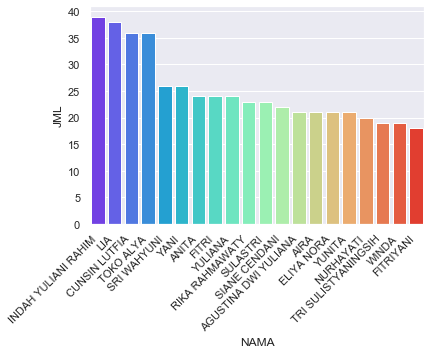

In [20]:
nama_chart = sns.barplot(x=top10_nama.index,y='JML', data=top10_nama, palette='rainbow')
#top10_kota.info()
nama_chart.set_xticklabels(nama_chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [21]:
indah = all_data[all_data['NAMA'] == 'INDAH YULIANI RAHIM']
indah[['JML','TGL TRF']]

,JML,TGL TRF
8607,39.0,201912.0


In [22]:
indah[['JML','TGL TRF']].to_csv("indah.csv")

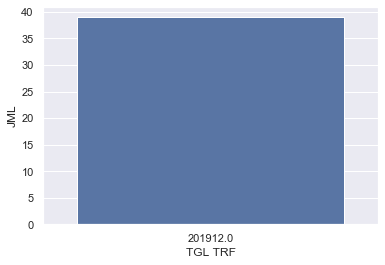

In [23]:
sns.barplot(x='TGL TRF', y='JML',data=indah)

In [24]:
lia = all_data[all_data['NAMA'] == 'LIA']
#lia['TGL TRF'].set_option('precision', 0)
#lia[['JML','TGL TRF']].head()
lia.head()

,#REF!,ALAMAT,BANK,CS,DISKON,EKSPEDISI,JML,KET,NAMA,NAMA/KODE CS,NO HP,NOMINAL,ONGKIR,ORDERAN,TGL ORDER,TGL TRF,Unnamed: 16,VALIDASI,no,KOTA
1345,NaN,PERUM BCA BLOK I17 NO 27 DS. CIANTRA RT10/RW12...,COD,CS YENI (082321458214),50000,SAP Express,1.0,NaN,LIA,NaN,089678836198,88500,13500,Khimar Shaina Maroon,22/05/19,201905.0,NaN,WAWAT,(22)6,BEKASI
1910,NaN,JL. H. AHMAD DINAR RT. 02 RW. 01 DS. TERATE ( ...,BCA,CS Delly (089618850096),NaN,JNE REG,5.0,NaN,LIA,NaN,85210007448,1071008,44000,"zenya rose S set, Zinnia smoke M set ,Zinnia M...",2019-05-11 00:00:00,201905.0,NaN,NaN,(13)2,SERANG
2678,NaN,ALAMAT:PERUM BUMI CIKARANG ASRI(BCA) BLOK I17 ...,COD SAP,SALMA (089663515811),NaN,COD SAP,2.0,Total 96.300,LIA,NaN,89678836198,96300,13500,-Khimar Aara Navy M\n-Khimar Aara Light Brown M,2019-06-28 00:00:00,201906.0,NaN,NaN,(29)3,BEKASI
3446,NaN,ALAMAT LENGKAP : JLN.CILIWUNG 3 RT 06 RW 01 LI...,BCA,SALMA (089663515811),NaN,JNE OKE,4.0,NaN,LIA,NaN,8121560648,1016000,44000,-Zinnia Smoke M SET\n-Fayra Babypink M DO (def...,2019-07-12 00:00:00,201907.0,NaN,NaN,(12)3,NGANJUK
3462,NaN,ALAMAT LENGKAP : JLN.CILIWUNG 3 RT 06 RW 01 LI...,BCA,SALMA (089663515811),NaN,JNE REG,4.0,NaN,LIA,NaN,8121560648,1002000,44000,-Grizel Cerry L SET\n-Dress Saafia Hitam M DO ...,2019-07-16 00:00:00,201907.0,NaN,NaN,(17)2,NGANJUK


[Text(0, 0, '201905.0'),
 Text(0, 0, '201906.0'),
 Text(0, 0, '201907.0'),
 Text(0, 0, '201908.0'),
 Text(0, 0, '201910.0'),
 Text(0, 0, '201911.0'),
 Text(0, 0, '201912.0'),
 Text(0, 0, '202001.0')]

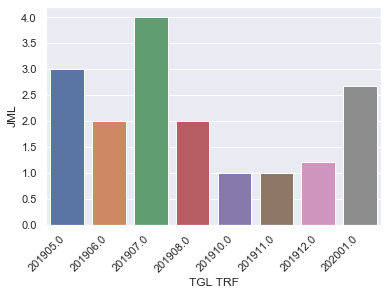

In [25]:
lia_chart = sns.barplot(x='TGL TRF', y='JML',data=lia, ci=None)
lia_chart.set_xticklabels(lia_chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [26]:
cunsin = all_data[all_data['NAMA'] == 'CUNSIN LUTFIA']
cunsin[['JML','TGL TRF']]

,JML,TGL TRF
60,18.0,201904.0
7629,18.0,201912.0


In [27]:
alya = all_data[all_data['NAMA'] == 'TOKO ALYA'].groupby('TGL TRF').sum()
#alya[['JML','TGL TRF']]
alya

,#REF!,JML
TGL TRF,,
201907.0,0.0,28.0
201908.0,0.0,4.0
201909.0,0.0,4.0


In [28]:
sri = all_data[all_data['NAMA'] == 'SRI WAHYUNI'].groupby('TGL TRF').sum().drop(columns=['#REF!'])
sri

,JML
TGL TRF,
201904.0,7.0
201907.0,1.0
201908.0,2.0
201909.0,1.0
201911.0,4.0
201912.0,8.0
202001.0,2.0
202002.0,1.0


In [29]:
#plgn = all_data[all_data['NAMA'].isin(top10_nama.index)].groupby(['NAMA','TGL TRF']).sum().drop(columns=['#REF!'])
plgn = all_data[all_data['NAMA'].isin(top10_nama.index)].groupby(['NAMA','TGL TRF']).sum().unstack(fill_value=0).stack().drop(columns=['#REF!'])
plgn.head(20)
#type(plgn.index.get_level_values(0))

JML
NAMA                 TGL TRF      
AGUSTINA DWI YULIANA 201904.0  0.0
                     201905.0  0.0
                     201906.0  0.0
                     201907.0  5.0
                     201908.0  4.0
                     201909.0  4.0
                     201910.0  0.0
                     201911.0  6.0
                     201912.0  2.0
                     202001.0  0.0
                     202002.0  0.0
AIRA                 201904.0  0.0
                     201905.0  0.0
                     201906.0  0.0
                     201907.0  0.0
                     201908.0  0.0
                     201909.0  0.0
                     201910.0  0.0
                     201911.0  0.0
                     201912.0  4.0

In [30]:
pd.set_option('display.max_colwidth', 50)
all_data[all_data['NAMA'] == 'TOKO ALYA']['ORDERAN']

3219    Dress Tisha Navy XL set 1 pcs, Dress Carys Pea...
3220    Dress Carys Kids Peanut Umur 3 Set, Dress Cary...
3242    Dress Fayra salmon L set, Dress fayra salmon k...
3516    Dress Tisha Navy XL set 1 pcs, Dress Carys Pea...
3517    Dress Carys Kids Peanut Umur 3 Set, Dress Cary...
3539    Dress Fayra salmon L set, Dress fayra salmon k...
4783    Dress Neisha Orange juice L set, dress Neisha ...
5329    Dress Neisha Orange juice L set, dress Neisha ...
Name: ORDERAN, dtype: object

In [31]:
# Perbandingan umur dengan melihat warna pesanan

# Kolom orderan dalam uppercase
all_data['ORDERAN'] = all_data['ORDERAN'].str.upper()
all_data.head()

,#REF!,ALAMAT,BANK,CS,DISKON,EKSPEDISI,JML,KET,NAMA,NAMA/KODE CS,NO HP,NOMINAL,ONGKIR,ORDERAN,TGL ORDER,TGL TRF,Unnamed: 16,VALIDASI,no,KOTA
0,NaN,JL. TEMPUREJO GANG V/7 RT/RW: 002/003 KEC : MU...,BCA,CS YENI (082321458214),NaN,JNE REG,1.0,NaN,ULICK,NaN,085737824872,208003,19000,FAZILLA PURPLE KIDS SIZE.5 (SET),30/03/19,201904.0,NaN,WAWAT,(01)1,SURABAYA
1,NaN,JL.PEMDA RT.9 MALINAU HULU KECAMATAN :MALINAU ...,BCA,CS YENI (082321458214),25000,JNE REG,6.0,NaN,RATNA PRATININGRUM,NaN,082254494711,1725003,146000,- ELENORA CREAM L(5) DO\n- ELENORA KIDS CREAM ...,30/03/19,201904.0,NaN,WAWAT,(01)2,MALINAU
2,NaN,DSN. CIAGEM RT 13/03 DSA. JAYAMAKMUR KECAMATAN...,BCA,CS YENI (082321458214),NaN,JNE REG,2.0,NaN,NURLAELAH,NaN,085811795122,354003,16000,- KEYA TARO XL DO\n- KHIMAR TISHA LAVENDER,30/03/19,201904.0,NaN,WAWAT,(01)3,KARAWANG
3,NaN,JALAN SEGARA MADU/PASAR IKAN KEDONGANAN DEPAN ...,BRI,CS YENI (082321458214),NaN,JNE REG,2.0,NaN,A JUNAIDI,NaN,083119548203,464003,24000,- ALESHA PEACH M DO\n- KHIMAR ELENORA PEACH (P...,30/03/19,201904.0,NaN,WAWAT,(01)4,BADUNG
4,NaN,PERUM CKM BLOK D13 NO 18(WARNA UNGU) RT 25 RW ...,BCA,CS YENI (082321458214),NaN,JNE REG,1.0,NaN,ARIYANTO SAPUTRO,NaN,081317578751,207003,12000,TISHA PUTIH M DO,31/03/19,201904.0,NaN,WAWAT,(01)5,KARAWANG


In [32]:
list_warna = ['HITAM', 'BLACK', 'NAVY', 'LAVENDER', 'BABYPINK', 'CHOCO', 'PEACH', 'MAGENTA', 'ROSE', 'MAUVE', 'PUTIH', 'WHITE', 'PINK', 'TOSCA', 'FLAMINGO', 'NUDE', 'PURPLE', 'CREAM', 'BEIGE', 'GOLD', 'BLUE', 'BIRU', 'PLUM', 'CORAL', 'BERRY', 'BLOOD', 'ORANGE', 'DARKBROWN', 'CHARWOOD', 'PEARL', 'GRAPE', 'GREEN', 'GREY', 'MAROON', 'ALMOND', 'BLUSH', 'DUSTYPINK', 'BROWN', 'MATCHA', 'BLUSH', 'NOUGAT', 'SALMON', 'BUBBLE GUM', 'BUBBLEGUM', 'MOCA', 'SAPHIRE', 'DENIM', 'LILAC', 'YELLOW', 'PUNCH', 'BABYBLUE', 'BERRY', 'AQUA']

In [33]:
# regex untuk mendeteksi nama kota dalam kolom alamat

war = '({})'.format('|'.join([r'\b{}\b'.format(x) for x in list_warna]))

all_data_warna = all_data['ORDERAN'].str.extract(war)
#all_data_kota[0].apply(type).value_counts()

all_data_warna

,0
0,PURPLE
1,CREAM
2,LAVENDER
3,PEACH
4,PUTIH
...,...
12151,MAGENTA
12152,MAGENTA
12154,BLACK
12155,BLACK


In [34]:
all_data['WARNA'] = all_data_warna[0]
all_data.head()

,#REF!,ALAMAT,BANK,CS,DISKON,EKSPEDISI,JML,KET,NAMA,NAMA/KODE CS,...,NOMINAL,ONGKIR,ORDERAN,TGL ORDER,TGL TRF,Unnamed: 16,VALIDASI,no,KOTA,WARNA
0,NaN,JL. TEMPUREJO GANG V/7 RT/RW: 002/003 KEC : MU...,BCA,CS YENI (082321458214),NaN,JNE REG,1.0,NaN,ULICK,NaN,...,208003,19000,FAZILLA PURPLE KIDS SIZE.5 (SET),30/03/19,201904.0,NaN,WAWAT,(01)1,SURABAYA,PURPLE
1,NaN,JL.PEMDA RT.9 MALINAU HULU KECAMATAN :MALINAU ...,BCA,CS YENI (082321458214),25000,JNE REG,6.0,NaN,RATNA PRATININGRUM,NaN,...,1725003,146000,- ELENORA CREAM L(5) DO\n- ELENORA KIDS CREAM ...,30/03/19,201904.0,NaN,WAWAT,(01)2,MALINAU,CREAM
2,NaN,DSN. CIAGEM RT 13/03 DSA. JAYAMAKMUR KECAMATAN...,BCA,CS YENI (082321458214),NaN,JNE REG,2.0,NaN,NURLAELAH,NaN,...,354003,16000,- KEYA TARO XL DO\n- KHIMAR TISHA LAVENDER,30/03/19,201904.0,NaN,WAWAT,(01)3,KARAWANG,LAVENDER
3,NaN,JALAN SEGARA MADU/PASAR IKAN KEDONGANAN DEPAN ...,BRI,CS YENI (082321458214),NaN,JNE REG,2.0,NaN,A JUNAIDI,NaN,...,464003,24000,- ALESHA PEACH M DO\n- KHIMAR ELENORA PEACH (P...,30/03/19,201904.0,NaN,WAWAT,(01)4,BADUNG,PEACH
4,NaN,PERUM CKM BLOK D13 NO 18(WARNA UNGU) RT 25 RW ...,BCA,CS YENI (082321458214),NaN,JNE REG,1.0,NaN,ARIYANTO SAPUTRO,NaN,...,207003,12000,TISHA PUTIH M DO,31/03/19,201904.0,NaN,WAWAT,(01)5,KARAWANG,PUTIH


In [35]:
all_data[all_data['WARNA'].isna()]

,#REF!,ALAMAT,BANK,CS,DISKON,EKSPEDISI,JML,KET,NAMA,NAMA/KODE CS,...,NOMINAL,ONGKIR,ORDERAN,TGL ORDER,TGL TRF,Unnamed: 16,VALIDASI,no,KOTA,WARNA
156,NaN,"JL. MUARA BARU, GG MARLINA RT 02/RW 17, PENJAR...",BRI,CS YENI (082321458214),NaN,JNE REG,2.0,NaN,BAPAK WIDI SAFRULLOH,NaN,...,155003,11000,- INNER RAJUT PAKET 1\n- HANDSOCK PAKET 2,24/04/19,201904.0,NaN,WAWAT,(24)7,JAKARTA UTARA,NaN
164,NaN,JL. KH AGUS SALIM LINK. LUWUNG SAWO RT 01 RW 0...,BRI,CS YENI (082321458214),NaN,JNE REG,1.0,NaN,QONITA,NaN,...,93003,14000,INNER RAJUT PAKET 1 (WARNA BARU),24/04/19,201904.0,NaN,Rosty,(25)5,CILEGON,NaN
195,NaN,"JL. SERSAN HAMID KOMPLEKS PLN LAMA KEL. KISAU,...",BRI,CS YENI (082321458214),NaN,POS,2.0,NaN,ANDI HAMDAN,NaN,...,168003,38000,HANDSOCK WARNA BARU PAKET 1 (2),29/04/19,201904.0,NaN,WAWAT,(29)10,NaN,NaN
251,NaN,JL BOLODEWO RT 4 RW 2 KLITIK WONOASRI MADIUN\n...,MANDIRI,Dea (085213414302),NaN,REG,1.0,NaN,AINE ARTALIA,NaN,...,298004,29000,SHAINA HOTAM M DO,2019-04-10 00:00:00,201904.0,NaN,NaN,(11)3,MADIUN,NaN
267,NaN,JLN JEMBATAN 3 RAYA NO 5D RT 003 RW 011 KEL PE...,BRI,Dea (085213414302),NaN,REG,1.0,NaN,SBC EXPRESS,NaN,...,270004,12000,YARA MARRON M DO,2019-04-09 00:00:00,201904.0,NaN,NaN,(13)1,JAKARTA UTARA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12081,NaN,KARANGSAMBUNG RT 003 RW 001 KECAMATAN : LOSARI...,MANDIRI,NENTI/12 (089663515811),NaN,JNE REG,1.0,NaN,RATNA BHENDOLL,Nenti/12,...,180321,27000,DIARA NACHO L DO (GB),NaN,202002.0,NaN,NaN,(27)29,BREBES,NaN
12084,NaN,JL. KYAI NURSIYAH RT.06 RW.04 NO.25 DESA KETAN...,BCA,DEA/5 (087725992232),NaN,POS,1.0,Di tf dari luar negri,CHOLID FADILAH,Dea/5,...,238097,19000,AYKOZ NAUGAT KIDS SIZE 10,NaN,202002.0,NaN,NaN,(28)3,BREBES,NaN
12088,NaN,JL SUDIMORO NO 25 KEL MOJOLANGU KEC LOWOKWARU ...,MANDIRI,DEPI/6 (0895700980983),NaN,POS,2.0,NaN,INDAH PUTRI,depi/6,...,658000,20000,ALEA RAIN M DO2,NaN,202002.0,NaN,NaN,NaN,MALANG,NaN
12091,NaN,KP GALIAN YAYASAN AL HUSNA WAZIADAH DESA SUKAM...,BCA,ASNIA/7 (085351961936),NaN,JNE REG,1.0,NaN,HJ HASINAH,Asnia/7,...,331007,12000,ALDYS PREAL XL DO,NaN,202002.0,NaN,NaN,(28)9,BEKASI,NaN


In [36]:
#all_data[all_data['WARNA'] == 'NAVY']['WARNA'].count()

warna = all_data.groupby('WARNA').sum().nlargest(10,'JML')
warna

,#REF!,JML,TGL TRF
WARNA,,,
NAVY,0.0,1632.0,192030149.0
CHOCO,0.0,1598.0,192835286.0
PINK,0.0,1308.0,154475927.0
HITAM,0.0,1231.0,148409939.0
MAGENTA,0.0,1039.0,132865636.0
LAVENDER,0.0,982.0,111055288.0
PEACH,0.0,950.0,108838264.0
SALMON,0.0,835.0,104391878.0
NUDE,0.0,675.0,80371233.0


[Text(0, 0, 'NAVY'),
 Text(0, 0, 'CHOCO'),
 Text(0, 0, 'PINK'),
 Text(0, 0, 'HITAM'),
 Text(0, 0, 'MAGENTA'),
 Text(0, 0, 'LAVENDER'),
 Text(0, 0, 'PEACH'),
 Text(0, 0, 'SALMON'),
 Text(0, 0, 'NUDE'),
 Text(0, 0, 'MAROON')]

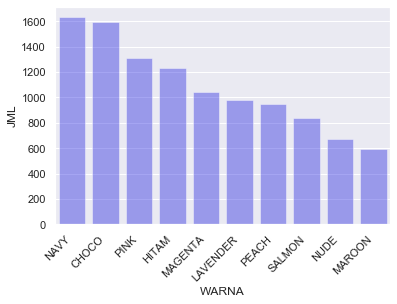

In [37]:
warna_chart = sns.barplot(x=warna.index, y='JML', data=warna, color='blue', alpha=0.4)
warna_chart.set_xticklabels(warna_chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [38]:
# Perbandingan jumlah set & dress only

set_do = ['SET', 'DO']

# regex untuk mendeteksi set/do dalam kolom 'ORDERAN'

sd = '({})'.format('|'.join([r'\b{}\b'.format(x) for x in set_do]))

all_data_set_do = all_data['ORDERAN'].str.extract(sd)

all_data_set_do

,0
0,SET
1,DO
2,DO
3,DO
4,DO
...,...
12151,DO
12152,DO
12154,DO
12155,NaN


In [39]:
all_data['SET_DO'] = all_data_set_do[0]
all_data.head()

,#REF!,ALAMAT,BANK,CS,DISKON,EKSPEDISI,JML,KET,NAMA,NAMA/KODE CS,...,ONGKIR,ORDERAN,TGL ORDER,TGL TRF,Unnamed: 16,VALIDASI,no,KOTA,WARNA,SET_DO
0,NaN,JL. TEMPUREJO GANG V/7 RT/RW: 002/003 KEC : MU...,BCA,CS YENI (082321458214),NaN,JNE REG,1.0,NaN,ULICK,NaN,...,19000,FAZILLA PURPLE KIDS SIZE.5 (SET),30/03/19,201904.0,NaN,WAWAT,(01)1,SURABAYA,PURPLE,SET
1,NaN,JL.PEMDA RT.9 MALINAU HULU KECAMATAN :MALINAU ...,BCA,CS YENI (082321458214),25000,JNE REG,6.0,NaN,RATNA PRATININGRUM,NaN,...,146000,- ELENORA CREAM L(5) DO\n- ELENORA KIDS CREAM ...,30/03/19,201904.0,NaN,WAWAT,(01)2,MALINAU,CREAM,DO
2,NaN,DSN. CIAGEM RT 13/03 DSA. JAYAMAKMUR KECAMATAN...,BCA,CS YENI (082321458214),NaN,JNE REG,2.0,NaN,NURLAELAH,NaN,...,16000,- KEYA TARO XL DO\n- KHIMAR TISHA LAVENDER,30/03/19,201904.0,NaN,WAWAT,(01)3,KARAWANG,LAVENDER,DO
3,NaN,JALAN SEGARA MADU/PASAR IKAN KEDONGANAN DEPAN ...,BRI,CS YENI (082321458214),NaN,JNE REG,2.0,NaN,A JUNAIDI,NaN,...,24000,- ALESHA PEACH M DO\n- KHIMAR ELENORA PEACH (P...,30/03/19,201904.0,NaN,WAWAT,(01)4,BADUNG,PEACH,DO
4,NaN,PERUM CKM BLOK D13 NO 18(WARNA UNGU) RT 25 RW ...,BCA,CS YENI (082321458214),NaN,JNE REG,1.0,NaN,ARIYANTO SAPUTRO,NaN,...,12000,TISHA PUTIH M DO,31/03/19,201904.0,NaN,WAWAT,(01)5,KARAWANG,PUTIH,DO


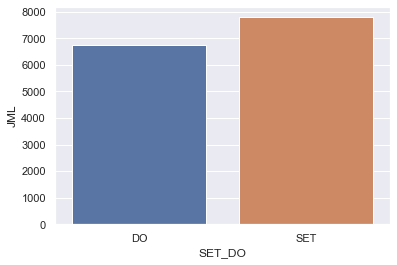

In [40]:
set_do_group = all_data.groupby('SET_DO').sum()

set_do_chart = sns.barplot(x=set_do_group.index, y='JML', data=set_do_group)

([<matplotlib.patches.Wedge at 0x21f03417848>,
 [Text(0.12348999105810628, 1.0930463037348734, '6747.0'),
  Text(-0.12348999105810665, -1.0930463037348732, '7788.0')])

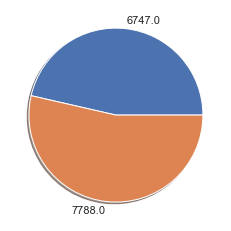

In [41]:
plt.pie(set_do_group['JML'],labels=set_do_group['JML'],shadow=True)

In [42]:
tr_per_bulan = all_data.groupby('TGL TRF').sum()
tr_per_bulan

,#REF!,JML
TGL TRF,,
201904.0,0.0,1981.0
201905.0,0.0,2065.0
201906.0,0.0,428.0
201907.0,0.0,1517.0
201908.0,0.0,2184.0
201909.0,0.0,905.0
201910.0,0.0,365.0
201911.0,0.0,2607.0
201912.0,0.0,3338.0


[Text(0, 0, 'Apr 2019'),
 Text(0, 0, 'Mei 2019'),
 Text(0, 0, 'Jun 2019'),
 Text(0, 0, 'Jul 2019'),
 Text(0, 0, 'Agu 2019'),
 Text(0, 0, 'Sep 2019'),
 Text(0, 0, 'Okt 2019'),
 Text(0, 0, 'Nov 2019'),
 Text(0, 0, 'Des 2019'),
 Text(0, 0, 'Jan 2020'),
 Text(0, 0, 'Feb 2020')]

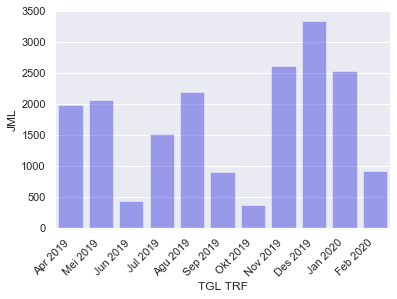

In [43]:
bulan_chart = sns.barplot(x=tr_per_bulan.index, y='JML', data=tr_per_bulan, color='blue', alpha=0.4)
bulan_chart.set_xticklabels(['Apr 2019','Mei 2019','Jun 2019','Jul 2019','Agu 2019','Sep 2019','Okt 2019','Nov 2019','Des 2019','Jan 2020','Feb 2020'], rotation=45, horizontalalignment='right')
#bulan_chart = sns.lineplot(x=tr_per_bulan.index, y='JML', data=tr_per_bulan)
#bulan_chart.set_xticks(range(len(tr_per_bulan)))
#bulan_chart.set_xticklabels(bulan_chart.get_xticklabels(), rotation=45, horizontalalignment='right')
#range(len(tr_per_bulan))

In [44]:
l1 = [1, 2, 3, 'A']
#type(l1)
#all_data.groupby('TGL TRF')
sum(filter(lambda i: isinstance(i, int), l1))

6

In [45]:
all_data['NOMINAL'].apply(type).value_counts()

<class 'int'>      11107
<class 'str'>        191
<class 'float'>       13
Name: NOMINAL, dtype: int64

In [47]:
# Try Regex

import re
s = "These are oranges and apples and pears, but not pinapples or .. and what or not and"
r = re.compile(r'\bAND\b | \bOR\b | \bNOT\b', flags=re.I | re.X)
list_regex = r.findall(s)
list_regex

['and', 'and', 'not', 'or', 'and', 'or', 'not', 'and']

In [62]:
# Extract ukuran

list_ukuran = [' S ', ' M ', ' L ', 'XL', 'XXL']

lu = '({})'.format('|'.join([r'\b{}\b'.format(x) for x in list_ukuran]))

all_data_lu = all_data['ORDERAN'].str.extract(lu)

all_data_lu.head()

,0
0,NaN
1,NaN
2,XL
3,M
4,M


In [58]:
# Membuat kolom ukuran

all_data['UKURAN'] = all_data_lu[0]
all_data.head()

,#REF!,ALAMAT,BANK,CS,DISKON,EKSPEDISI,JML,KET,NAMA,NAMA/KODE CS,...,ORDERAN,TGL ORDER,TGL TRF,Unnamed: 16,VALIDASI,no,KOTA,WARNA,SET_DO,UKURAN
0,NaN,JL. TEMPUREJO GANG V/7 RT/RW: 002/003 KEC : MU...,BCA,CS YENI (082321458214),NaN,JNE REG,1.0,NaN,ULICK,NaN,...,FAZILLA PURPLE KIDS SIZE.5 (SET),30/03/19,201904.0,NaN,WAWAT,(01)1,SURABAYA,PURPLE,SET,NaN
1,NaN,JL.PEMDA RT.9 MALINAU HULU KECAMATAN :MALINAU ...,BCA,CS YENI (082321458214),25000,JNE REG,6.0,NaN,RATNA PRATININGRUM,NaN,...,- ELENORA CREAM L(5) DO\n- ELENORA KIDS CREAM ...,30/03/19,201904.0,NaN,WAWAT,(01)2,MALINAU,CREAM,DO,NaN
2,NaN,DSN. CIAGEM RT 13/03 DSA. JAYAMAKMUR KECAMATAN...,BCA,CS YENI (082321458214),NaN,JNE REG,2.0,NaN,NURLAELAH,NaN,...,- KEYA TARO XL DO\n- KHIMAR TISHA LAVENDER,30/03/19,201904.0,NaN,WAWAT,(01)3,KARAWANG,LAVENDER,DO,XL
3,NaN,JALAN SEGARA MADU/PASAR IKAN KEDONGANAN DEPAN ...,BRI,CS YENI (082321458214),NaN,JNE REG,2.0,NaN,A JUNAIDI,NaN,...,- ALESHA PEACH M DO\n- KHIMAR ELENORA PEACH (P...,30/03/19,201904.0,NaN,WAWAT,(01)4,BADUNG,PEACH,DO,M
4,NaN,PERUM CKM BLOK D13 NO 18(WARNA UNGU) RT 25 RW ...,BCA,CS YENI (082321458214),NaN,JNE REG,1.0,NaN,ARIYANTO SAPUTRO,NaN,...,TISHA PUTIH M DO,31/03/19,201904.0,NaN,WAWAT,(01)5,KARAWANG,PUTIH,DO,M


In [63]:
ukuran = all_data.groupby('UKURAN').sum().drop(columns=['#REF!', 'TGL TRF'])
ukuran.head()

,JML
UKURAN,
L,2502.0
M,4284.0
S,3908.0
XL,2435.0


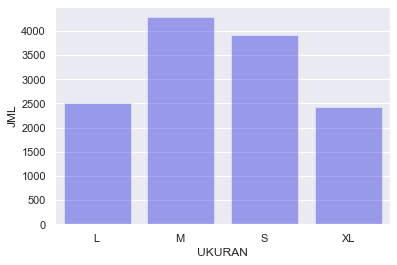

In [64]:
ukuran_chart = sns.barplot(x=ukuran.index, y='JML', data=ukuran, color='blue', alpha=0.4)

In [75]:
# Hitung model

sheika_excel = pd.read_excel('Sheika Excel.xlsx',sheet_name=1) # can also index sheet by name or fetch all sheets
non_khimar = sheika_excel['NON KHIMAR'].tolist()
khimar = sheika_excel['KHIMAR'].tolist()
pants = sheika_excel['PANTS'].tolist()

In [74]:
# non khimar

nk = '({})'.format('|'.join([r'\b{}\b'.format(x) for x in non_khimar]))

all_data_nk = all_data['ORDERAN'].str.extract(nk)

all_data_nk.head()

,0
0,FAZILLA
1,ELENORA
2,KEYA
3,ELENORA
4,TISHA


In [105]:
# Membuat kolom Non khimar
all_data['NON KHIMAR'] = all_data_nk[0]

In [117]:
# Non khimar groupby
non_khimar_groupby = all_data.groupby('NON KHIMAR').sum().drop(columns=['#REF!', 'TGL TRF'])
non_khimar_groupby

,JML
NON KHIMAR,
ALDYS,141.0
ALEA,210.0
AYKIZ,1087.0
BRIA,136.0
CARYS,945.0
DIARA,878.0
ELENORA,675.0
FAYRA,2538.0
FAZILLA,46.0


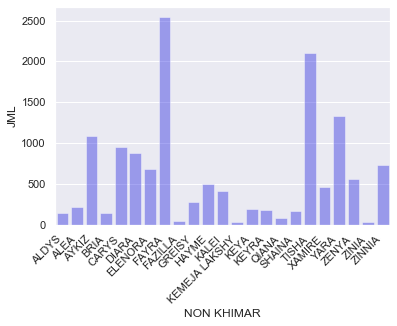

In [93]:
# Non khimar chart
non_khimar_chart = sns.barplot(x=non_khimar_groupby.index, y='JML', data=non_khimar_groupby, color='blue', alpha=0.4)
non_khimar_chart.set_xticklabels(non_khimar_chart.get_xticklabels(), rotation=45, horizontalalignment='right')
non_khimar_chart

In [104]:
# Non khimar top 10
non_khimar_top10 = all_data.groupby('NON KHIMAR').sum().nlargest(10,'JML').drop(columns=['#REF!', 'TGL TRF'])
non_khimar_top10.head()

,JML
NON KHIMAR,
FAYRA,2538.0
TISHA,2100.0
YARA,1335.0
AYKIZ,1087.0
CARYS,945.0


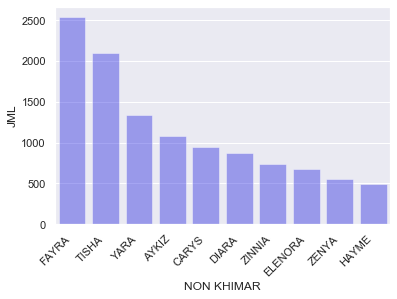

In [99]:
# Non khimar top 10 chart
non_khimar_top10_chart = sns.barplot(x=non_khimar_top10.index, y='JML', data=non_khimar_top10, color='blue', alpha=0.4)
non_khimar_top10_chart.set_xticklabels(non_khimar_top10_chart.get_xticklabels(), rotation=45, horizontalalignment='right')
non_khimar_top10_chart

In [84]:
# khimar

k = '({})'.format('|'.join([r'\b{}\b'.format(x) for x in khimar]))

all_data_k = all_data['ORDERAN'].str.extract(k)

all_data_k.head()

,0
0,NaN
1,NaN
2,NaN
3,KHIMAR ELENORA
4,NaN


In [108]:
# Membuat kolom khimar
all_data['KHIMAR'] = all_data_k[0]

In [116]:
# Non khimar groupby
khimar_groupby = all_data.groupby('KHIMAR').sum().drop(columns=['#REF!', 'TGL TRF'])
khimar_groupby

,JML
KHIMAR,
KHIMAR AARA,727.0
KHIMAR AMIRA,5.0
KHIMAR AZNI,28.0
KHIMAR ELENORA,290.0
KHIMAR FAIHA,4.0
KHIMAR FAYRA,136.0
KHIMAR GRIZEL,25.0
KHIMAR HALWA,103.0
KHIMAR HULYA,25.0


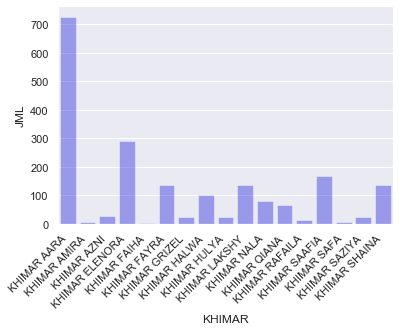

In [113]:
# khimar chart
khimar_chart = sns.barplot(x=khimar_groupby.index, y='JML', data=khimar_groupby, color='blue', alpha=0.4)
khimar_chart.set_xticklabels(khimar_chart.get_xticklabels(), rotation=45, horizontalalignment='right')
khimar_chart

In [114]:
# khimar top 5
khimar_top5 = all_data.groupby('KHIMAR').sum().nlargest(5,'JML').drop(columns=['#REF!', 'TGL TRF'])
khimar_top5.head()

,JML
KHIMAR,
KHIMAR AARA,727.0
KHIMAR ELENORA,290.0
KHIMAR SAAFIA,167.0
KHIMAR LAKSHY,137.0
KHIMAR FAYRA,136.0


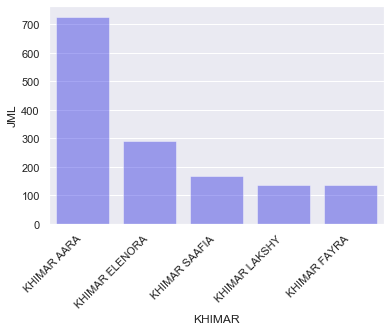

In [115]:
# Khimar top 5 chart
khimar_top5_chart = sns.barplot(x=khimar_top5.index, y='JML', data=khimar_top5, color='blue', alpha=0.4)
khimar_top5_chart.set_xticklabels(khimar_top5_chart.get_xticklabels(), rotation=45, horizontalalignment='right')
khimar_top5_chart